In [1]:
!pip install seaborn

In [2]:
!pip install --upgrade matplotlib


In [3]:
!pip install sckit learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.utils import shuffle

# Ignore warnings
warnings.filterwarnings("ignore")

In [5]:
def load_and_display_csv(csv_file_path):
    # Load the CSV file into a DataFrame
    data = pd.read_csv(csv_file_path)

    # Display the first 20 rows of the DataFrame
    print("First 20 rows of the dataset:")
    display(data.head(20))

    # Display information about the DataFrame
    print("\nDataFrame Information:")
    display(data.info())

    # Print statistical summary of the DataFrame
    print("\nStatistical summary of the dataset:")
    display(data.describe())

# Specify the path to your PayPal credit card CSV file
csv_file_path_paypal = "my_paypal_creditcard.csv"

# Call the function to load and display the PayPal credit card CSV file, and print the statistical summary
load_and_display_csv(csv_file_path_paypal)



First 20 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

None


Statistical summary of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
def clean_and_display_dataset(input_csv):
    # Load the CSV file into a DataFrame
    data = pd.read_csv(input_csv)

    # Data cleaning operations

    # Handling missing values
    missing_values = data.isnull().sum()
    print("Missing Values:")
    display(missing_values)

    
    # For demonstration, let's fill missing numerical values with the mean
    data.fillna(data.mean(), inplace=True)

    # Removing duplicate rows
    data.drop_duplicates(inplace=True)

    # Print information about the cleaned dataset
    print("\nCleaned Dataset Information:")
    display(data.info())

    # Display the first few rows of the cleaned dataset
    print("\nCleaned Dataset:")
    display(data.head(20))

# Specify the path to your original CSV file
input_csv_file = "my_paypal_creditcard.csv"

# Call the function to clean and display the dataset
clean_and_display_dataset(input_csv_file)


Missing Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null

None


Cleaned Dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


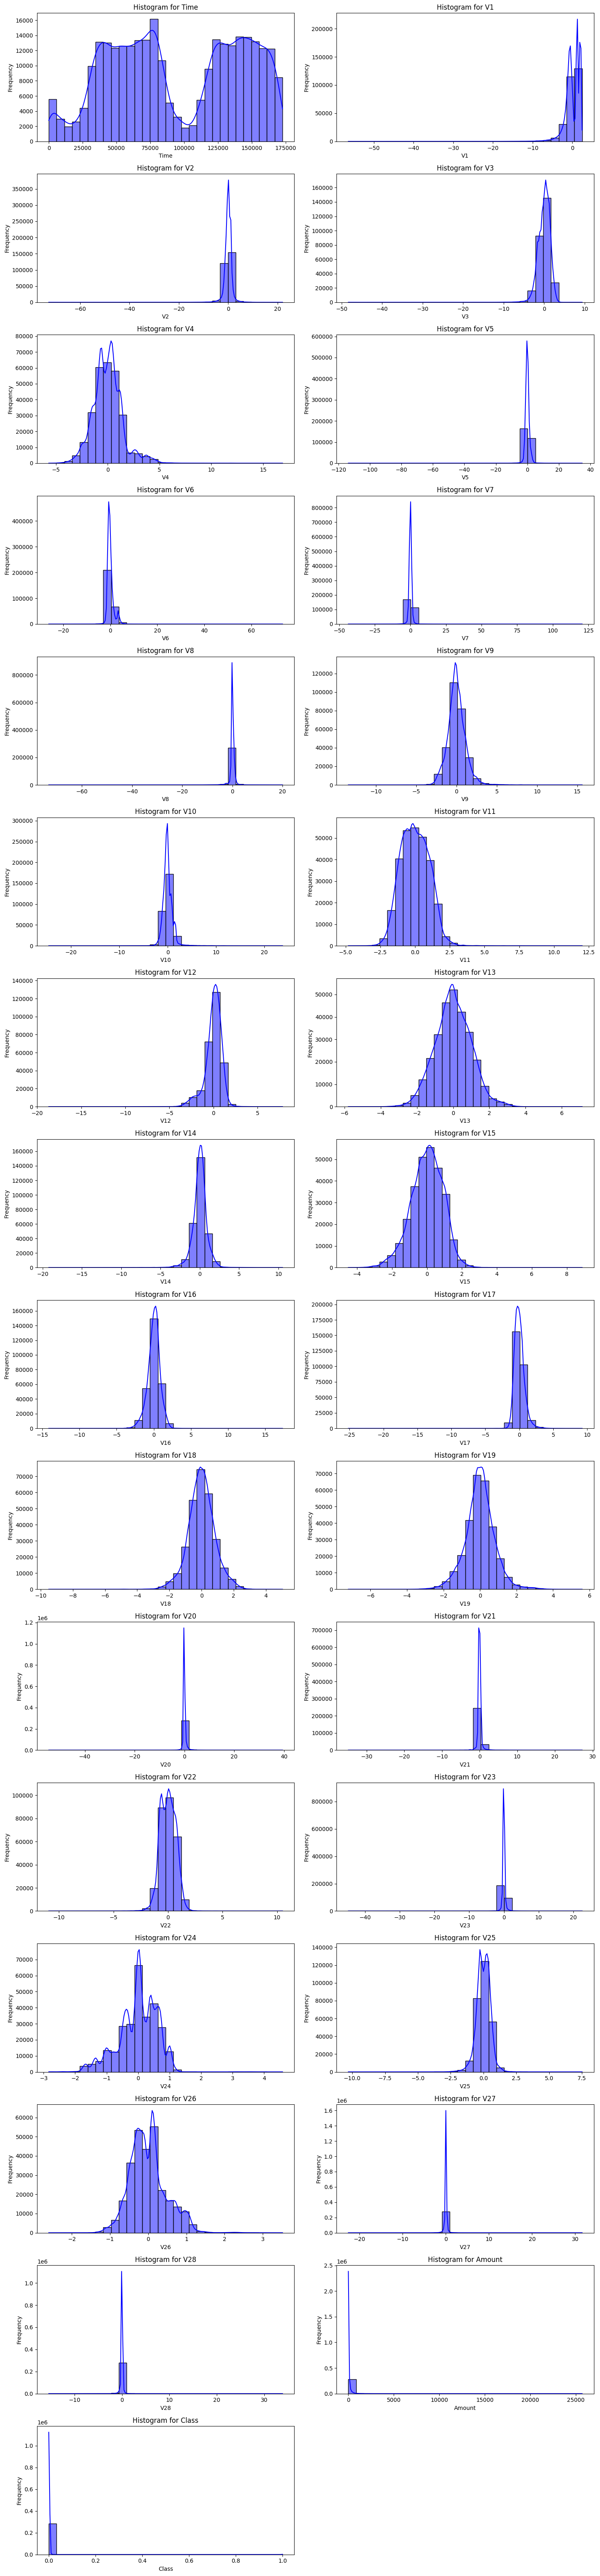

In [7]:
def plot_histogram_subplots(dataset):
    # Replace infinite values with NaN
    dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Select numerical columns for the histogram
    numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

    # Calculate the number of rows and columns for subplots
    num_plots = len(numerical_columns)
    num_cols = 2  # You can adjust the number of columns based on your preference
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Plot histograms for numerical features in subplots
    plt.figure(figsize=(15, 4 * num_rows))

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(dataset[column], kde=True, bins=30, color='blue')
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Specify the path to your original CSV file
input_csv_file = "my_paypal_creditcard.csv"

# Load the dataset
dataset = pd.read_csv(input_csv_file)

# Call the function to plot histograms
plot_histogram_subplots(dataset)


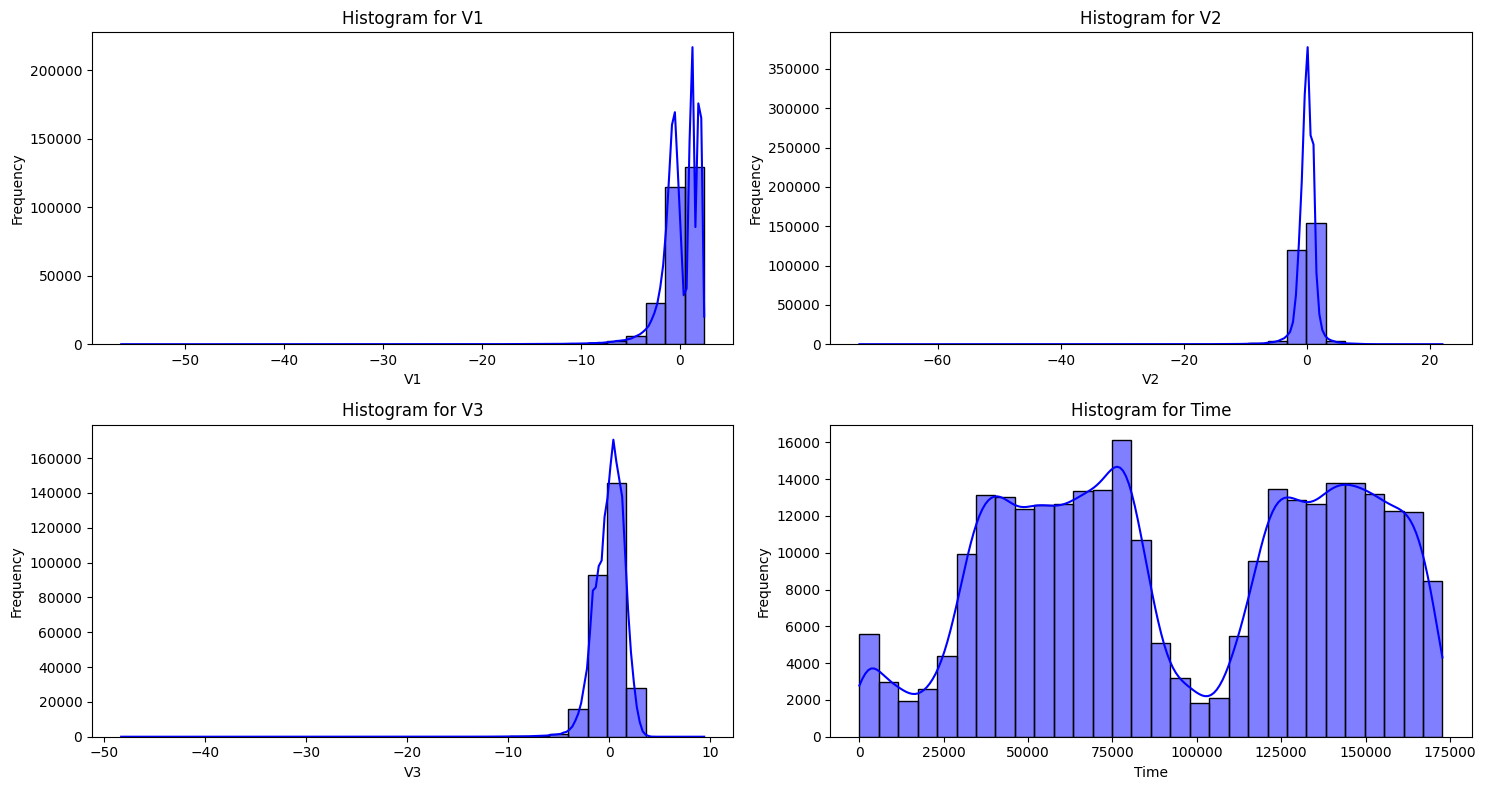

In [8]:
def plot_histogram_subplots(dataset, column_subset=None):
    if column_subset:
        numerical_columns = column_subset
    else:
        numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

    # Calculate the number of rows and columns for subplots
    num_plots = len(numerical_columns)
    num_cols = 2  # You can adjust the number of columns based on your preference
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Plot histograms for numerical features in subplots
    plt.figure(figsize=(15, 4 * num_rows))

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(dataset[column], kde=True, bins=30, color='blue')
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Specify the path to your original CSV file
input_csv_file = "my_paypal_creditcard.csv"

# Load the CSV file into a DataFrame
dataset = pd.read_csv(input_csv_file)

# Choose a subset of columns for the histogram (you can modify this based on your interest)
columns_of_interest_hist = ["V1", "V2", "V3", "Time"]

# Call the function to plot histograms for the selected columns in subplots
plot_histogram_subplots(dataset, column_subset=columns_of_interest_hist)


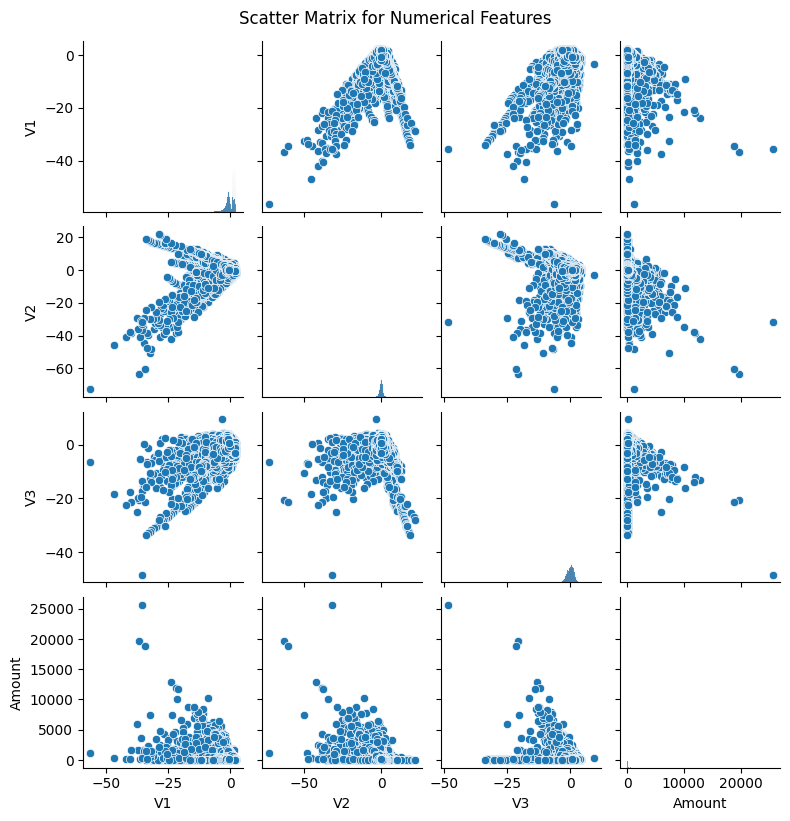

In [9]:
def plot_scatter_matrix(dataset, column_subset=None):
    if column_subset:
        numerical_columns = column_subset
    else:
        numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

    # Plot scatter matrix for numerical features
    sns.pairplot(dataset[numerical_columns], height=2)
    plt.suptitle('Scatter Matrix for Numerical Features', y=1.02)
    plt.show()

# Specify the path to your original CSV file
input_csv_file = "my_paypal_creditcard.csv"

# Load the CSV file into a DataFrame
dataset = pd.read_csv(input_csv_file)

# Choose a subset of columns to visualize (you can modify this based on your interest)
columns_of_interest = ["V1", "V2", "V3", "Amount"]

# Call the function to plot the scatter matrix for the selected columns
plot_scatter_matrix(dataset, column_subset=columns_of_interest)


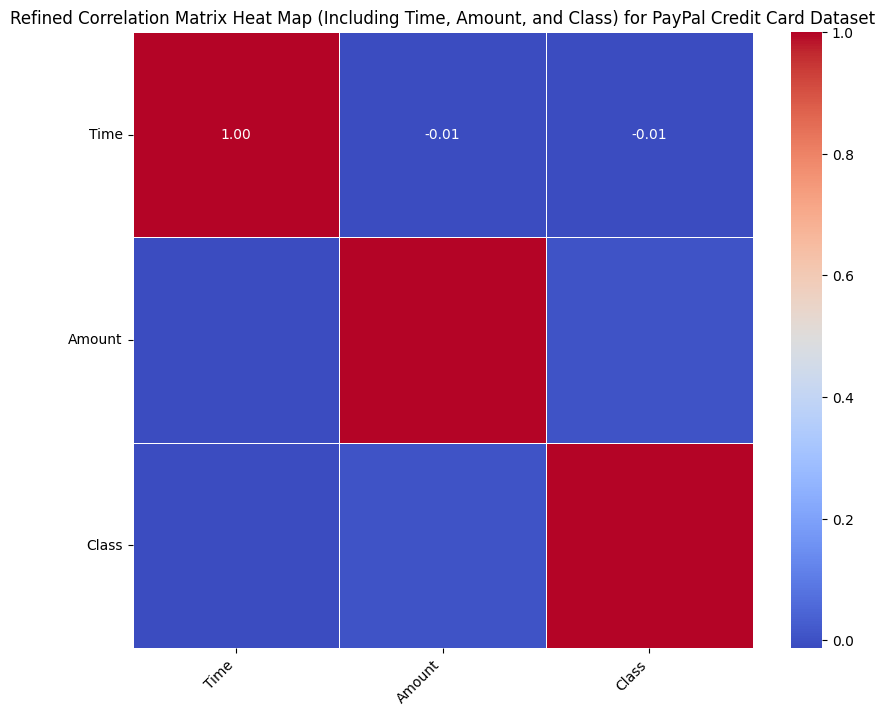

In [10]:
# Load the PayPal credit card dataset
csv_file_path_paypal = "my_paypal_creditcard.csv"
dataset = pd.read_csv(csv_file_path_paypal)

# Select columns for correlation matrix
columns_to_include = ['Time', 'Amount', 'Class']
correlation_matrix = dataset[columns_to_include].corr()

# Create a refined heat map
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 10})
plt.title('Refined Correlation Matrix Heat Map (Including Time, Amount, and Class) for PayPal Credit Card Dataset')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()


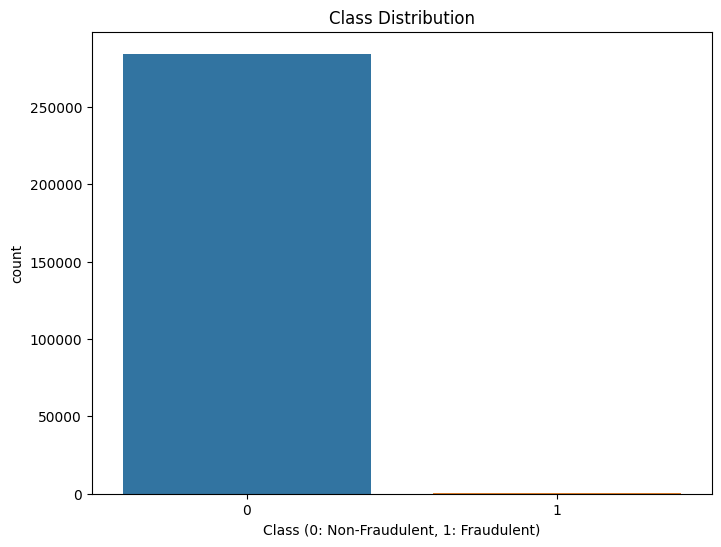

In [11]:
# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=dataset)  # Use the correct DataFrame name 'dataset'
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.show()


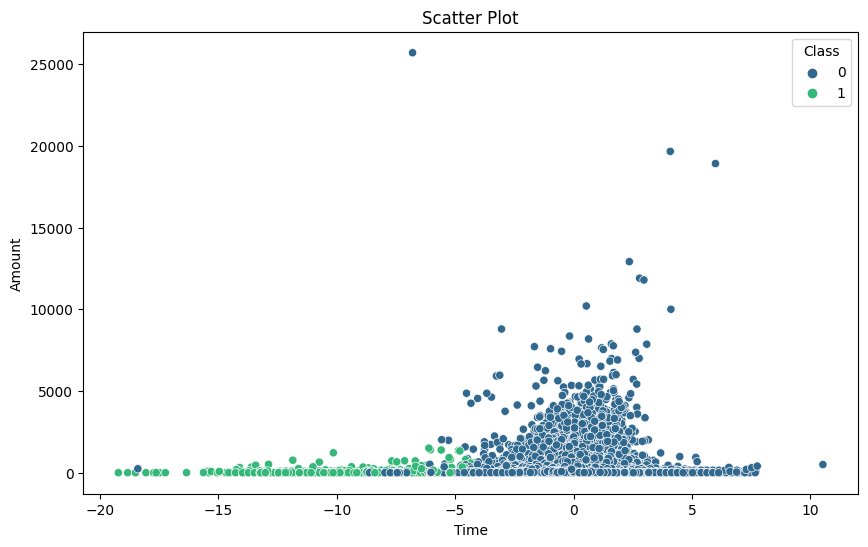

In [12]:
# Assuming 'dataset' is your DataFrame
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='V14', y='Amount', hue='Class', data=dataset, palette='viridis')
plt.title('Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


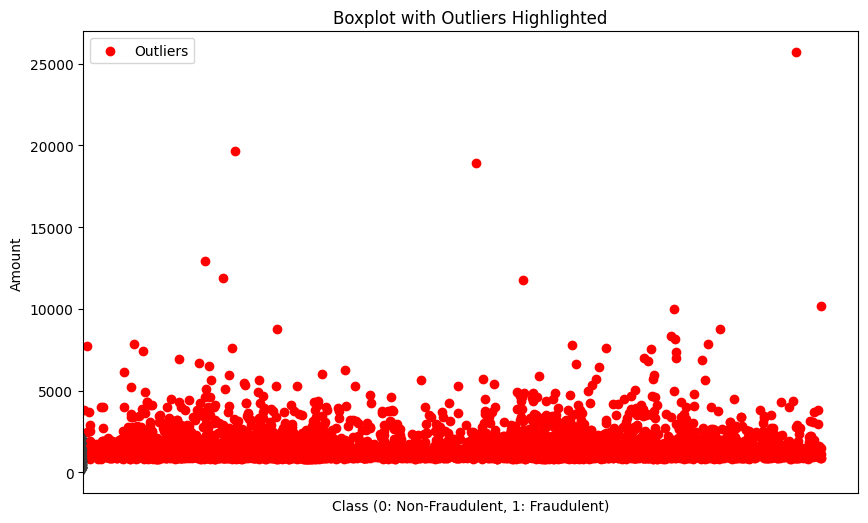

In [13]:
# Assuming 'dataset' is your DataFrame
amount_column = dataset['Amount']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(amount_column))

# Define a threshold for outliers (e.g., Z-score greater than 3)
outlier_threshold = 3

# Identify outliers
outliers = np.where(z_scores > outlier_threshold)[0]

# Plot a boxplot with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=dataset, showfliers=True)
plt.scatter(outliers, amount_column.iloc[outliers], color='red', label='Outliers')
plt.title('Boxplot with Outliers Highlighted')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Amount')
plt.legend()
plt.show()


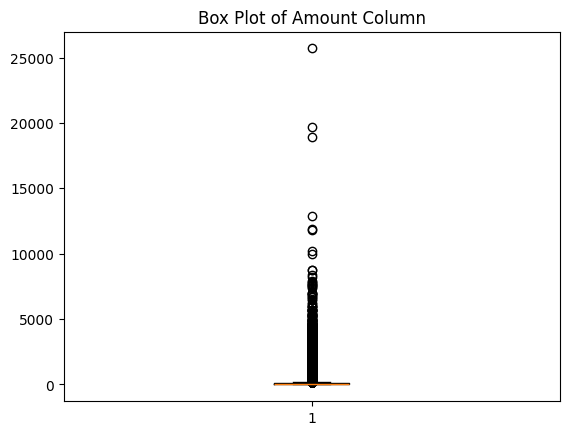

In [14]:
# Create a box plot for the 'amount' column
plt.boxplot(dataset['Amount'])
plt.title('Box Plot of Amount Column')
plt.show()


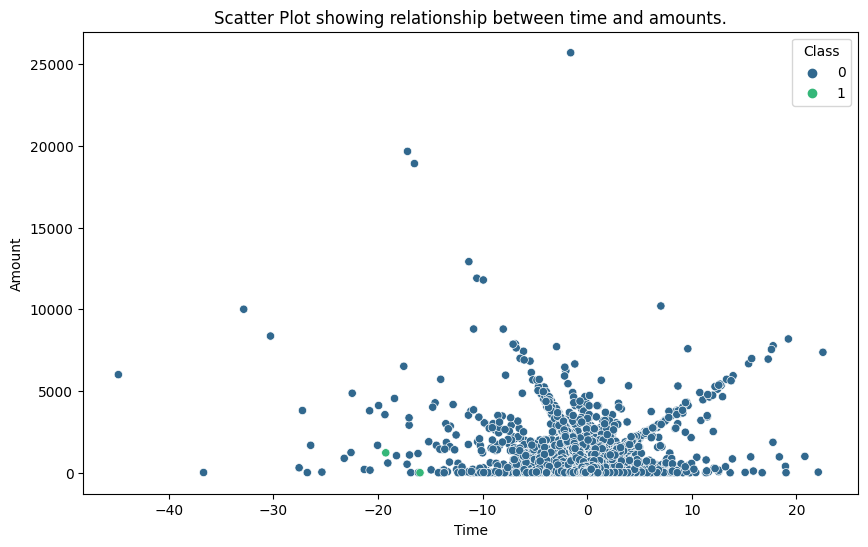

In [15]:
# Assuming 'dataset' is your DataFrame
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='V23', y='Amount', hue='Class', data=dataset, palette='viridis')
plt.title('Scatter Plot showing relationship between time and amounts.')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


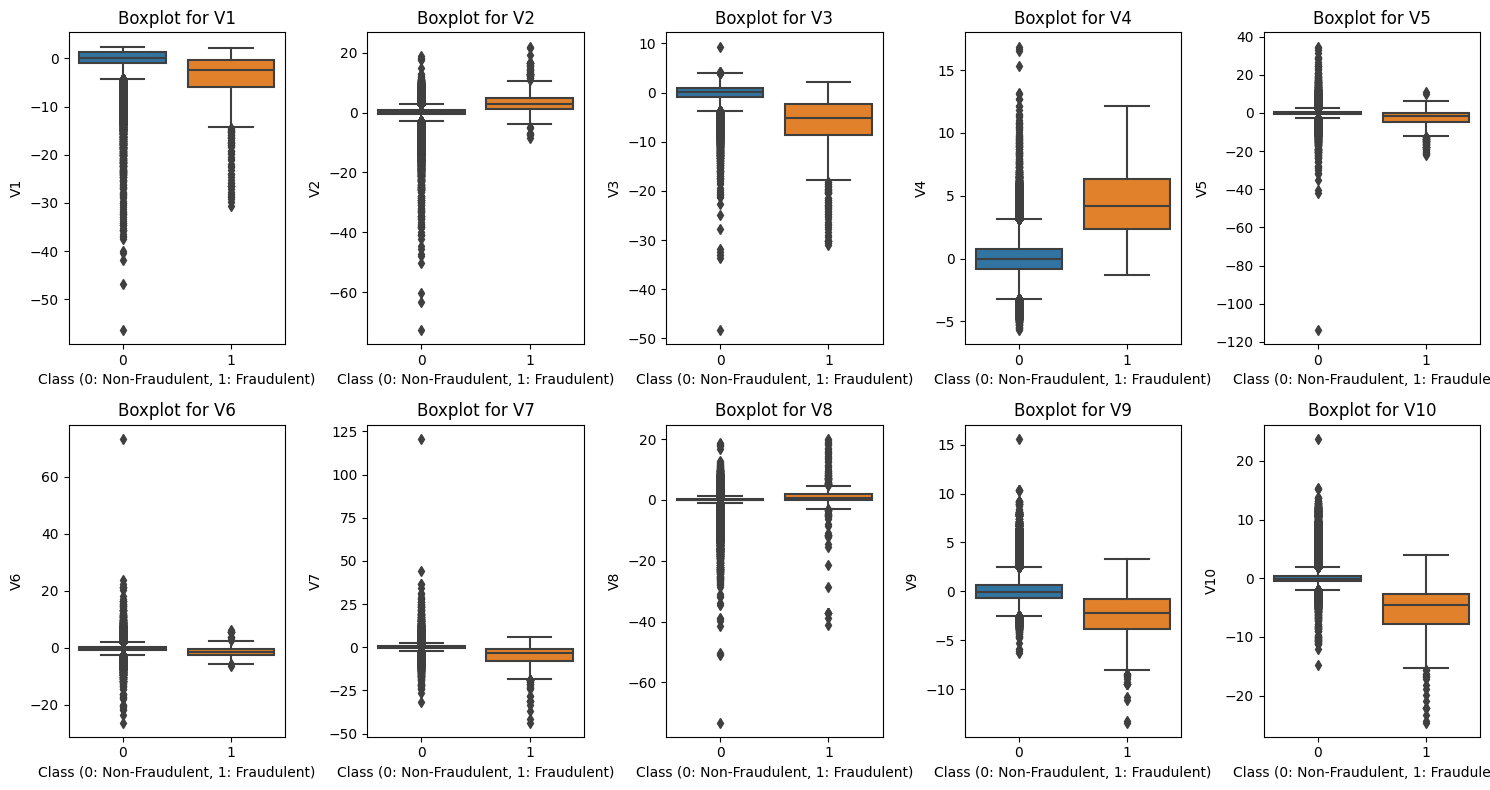

In [16]:
numerical_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']  # Replace with your numerical features
plt.figure(figsize=(15, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)  # Adjust the subplot layout based on the number of features
    sns.boxplot(x='Class', y=feature, data=dataset)
    plt.title(f'Boxplot for {feature}')
    plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


# MACHINE LEARNING

In [17]:
def clean_and_display_dataset(input_csv):
    # Load the CSV file into a DataFrame
    data = pd.read_csv(input_csv)

    # Data cleaning operations

    # Handling missing values
    missing_values = data.isnull().sum()
    print("Missing Values:")
    display(missing_values)

    # For demonstration, let's fill missing numerical values with the mean
    data.fillna(data.mean(), inplace=True)

    # Removing duplicate rows
    data.drop_duplicates(inplace=True)

    # Print information about the cleaned dataset
    print("\nCleaned Dataset Information:")
    display(data.info())

    # Display the first few rows of the cleaned dataset
    print("\nCleaned Dataset:")
    display(data.head(20))

    # Return the cleaned dataset
    return data

# Specify the path to your original CSV file
input_csv_file = "my_paypal_creditcard.csv"

# Call the function to clean and display the dataset
cleaned_dataset = clean_and_display_dataset(input_csv_file)


Missing Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null

None


Cleaned Dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [18]:
# DATA SPLITTING

In [19]:
# Split data into features (X) and target (y)
X = cleaned_dataset.drop('Class', axis=1)
y = cleaned_dataset['Class']

# Split data into training and testing sets separately
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((226980, 30), (56746, 30), (226980,), (56746,))

In [20]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# TRAINING THE MODEL

In [22]:
# Train the logistic regression model with balanced class weights
balanced_logreg = LogisticRegression(class_weight='balanced')
balanced_logreg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced')

In [23]:
# Make predictions on the test set
y_pred = balanced_logreg.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9776019455115779

Confusion Matrix:
 [[55395  1261]
 [   10    80]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.89      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746



In [24]:
# RANDOM FOREST MODEL

In [25]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_rep_rf)


Random Forest Classifier:
Accuracy: 0.9995418179254926

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [26]:
# SUPPORT VECTOR MACHINE MODEL

In [27]:
# Create and train the Support Vector Machine Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", classification_rep_svm)


Support Vector Machine Classifier:
Accuracy: 0.998413985126705

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



In [28]:
# XGBOOST CLASSIFIER MODEL

In [29]:
# Create and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_rep_xgb)


XGBoost Classifier:
Accuracy: 0.9995065731505305

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [30]:
# K- NEAREST NEIGHBORS MODEL

In [31]:
# Create and train the K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_knn)
print("\nClassification Report:\n", classification_rep_knn)


K-Nearest Neighbors Classifier:
Accuracy: 0.9984844746766292

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       1.00      0.04      0.09        90

    accuracy                           1.00     56746
   macro avg       1.00      0.52      0.54     56746
weighted avg       1.00      1.00      1.00     56746



# Transaction Data Sample

In [32]:
def generate_synthetic_data(num_samples=10000, fraud_ratio=0.01, random_seed=42):
    np.random.seed(random_seed)

    # Generate legitimate transactions
    num_legitimate = int(num_samples * (1 - fraud_ratio))
    legitimate_data = pd.DataFrame({
        'Amount': np.random.uniform(1, 500, num_legitimate),
        'V1': np.random.normal(0, 2, num_legitimate),
        'V2': np.random.normal(0, 2, num_legitimate),
        'V3': np.random.normal(0, 2, num_legitimate),
        'V4': np.random.normal(0, 2, num_legitimate),
        'Time': np.random.uniform(0, 24, num_legitimate),
        'Class': np.zeros(num_legitimate, dtype=int),  # 0 for legitimate transactions
    })

    # Generate fraudulent transactions
    num_fraudulent = num_samples - num_legitimate
    fraudulent_data = pd.DataFrame({
        'Amount': np.random.uniform(1, 500, num_fraudulent),
        'V1': np.random.normal(4, 2, num_fraudulent),  # Higher mean for V1 in fraudulent transactions
        'V2': np.random.normal(4, 2, num_fraudulent),
        'V3': np.random.normal(4, 2, num_fraudulent),
        'V4': np.random.normal(4, 2, num_fraudulent),
        'Time': np.random.uniform(0, 24, num_fraudulent),
        'Class': np.ones(num_fraudulent, dtype=int),  # 1 for fraudulent transactions
    })

    # Concatenate and shuffle the data
    synthetic_data = pd.concat([legitimate_data, fraudulent_data])
    synthetic_data = shuffle(synthetic_data, random_state=random_seed).reset_index(drop=True)

    return synthetic_data

# Example usage:
synthetic_data = generate_synthetic_data(num_samples=20000, fraud_ratio=0.02, random_seed=42)
print(synthetic_data.head())


       Amount        V1        V2        V3        V4       Time  Class
0  468.407275 -0.753209 -0.206081 -0.076019  3.062703  21.796631      0
1  281.050171 -2.175867 -1.567130  1.432912 -0.260684  18.524507      0
2  126.859344  1.686368 -0.943118  1.552622 -3.181659  17.662473      0
3  296.877027 -2.891220 -2.047142  0.785833  1.264391   3.224725      0
4  309.679884  2.345727 -1.884204 -0.208098  2.017844   1.231705      0


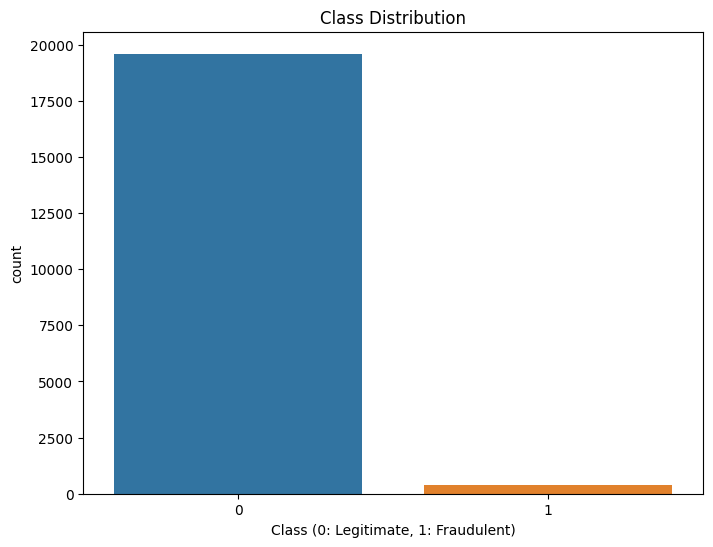

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=synthetic_data)
plt.title('Class Distribution')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.show()
